In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

In [2]:
sp = pd.read_csv(r'/Users/alexcombs/Downloads/spy.csv')

In [3]:
sp.sort_values('Date', inplace=True)

In [4]:
sp.reset_index(drop=True, inplace=True)

In [5]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,1457.599976
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,1438.560059
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000,1432.250000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,1449.680054
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,1465.150024


In [6]:
all_dates = sp[['Date']]

In [7]:
tkr_index = [x for x in all_dates.index if x % 15 == 0]

In [8]:
all_dates.ix[tkr_index]

,Date
0,2000-01-03
15,2000-01-25
30,2000-02-15
45,2000-03-08
60,2000-03-29
75,2000-04-19
90,2000-05-11
105,2000-06-02
120,2000-06-23
135,2000-07-17


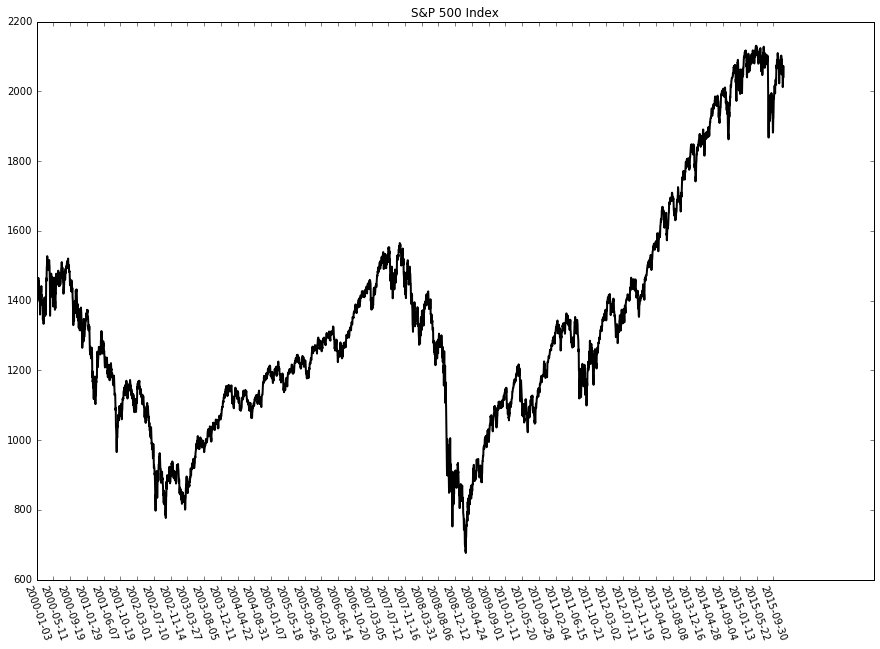

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('S&P 500 Index')
ax.plot(sp['Close'], color='k', linewidth=2)
ax.set_xticks(np.arange(0,len(sp),90));
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70);

In [10]:
ipos = pd.read_csv(r'/Users/alexcombs/Downloads/ipo_data.csv', encoding='latin-1')

In [11]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002-01-28,Synaptics,SYNA,Bear Stearns,$11.00,$13.11,$13.11,19.18%,$2.11,$2.11,2,NaN
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,$12.00,$12.01,$12.05,0.42%,$0.01,$0.05,1,NaN
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,$28.00,$30.05,$29.10,3.93%,$2.05,$1.10,3,NaN
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,$20.25,$21.25,$22.10,9.14%,$1.00,$1.85,3,NaN
4,2002-02-07,ManTech International,MANT,Jefferies,$16.00,$17.10,$18.21,13.81%,$1.10,$2.21,3,NaN
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,$19.50,$22.00,$22.60,15.90%,$2.50,$3.10,2,NaN
6,2002-02-13,GameStop,GME,Salomon Smith Barney,$18.00,$19.50,$20.10,11.67%,$1.50,$2.10,3,NaN
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,$13.00,$15.41,$20.09,54.54%,$2.41,$7.09,3,NaN
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,$19.00,$19.36,$20.00,5.26%,$0.36,$1.00,2,NaN
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,$22.00,$26.75,$25.00,13.64%,$4.75,$3.00,3,NaN


In [12]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))

In [13]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN


In [14]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 12 columns):
Date                        2335 non-null object
Issuer                      2335 non-null object
Symbol                      2335 non-null object
Lead/Joint-Lead Mangager    2335 non-null object
Offer Price                 2335 non-null object
Opening Price               2335 non-null object
1st Day Close               2335 non-null object
1st Day % Px Chng           2335 non-null object
$ Chg Opening               2335 non-null object
$ Chg Close                 2335 non-null object
Star Ratings                2335 non-null object
Performed                   259 non-null object
dtypes: object(12)
memory usage: 237.1+ KB


In [15]:
ipos.replace('N/C',0, inplace=True)

In [16]:
ipos[ipos['Date']=='11/120']
ipos.loc[1660, 'Date'] = pd.to_datetime('2012-11-20')

In [17]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [18]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 12 columns):
Date                        2335 non-null datetime64[ns]
Issuer                      2335 non-null object
Symbol                      2335 non-null object
Lead/Joint-Lead Mangager    2335 non-null object
Offer Price                 2335 non-null float64
Opening Price               2335 non-null float64
1st Day Close               2335 non-null float64
1st Day % Px Chng           2335 non-null float64
$ Chg Opening               2335 non-null float64
$ Chg Close                 2335 non-null float64
Star Ratings                2335 non-null int64
Performed                   259 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 237.1+ KB


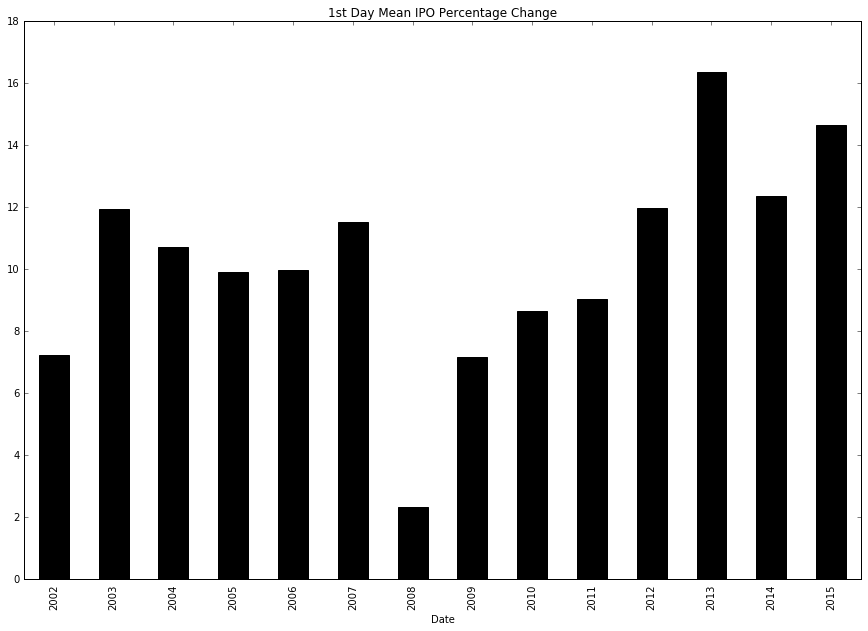

In [19]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

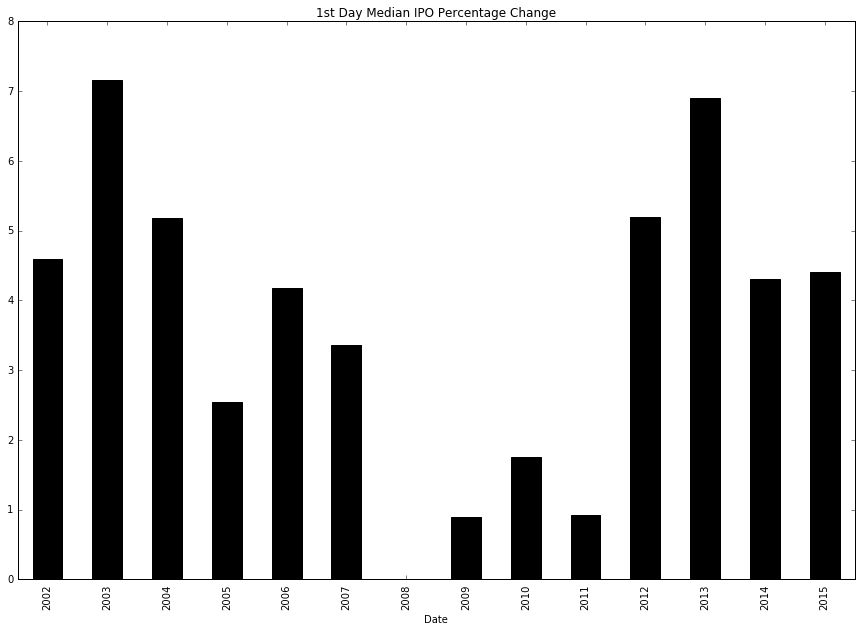

In [20]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

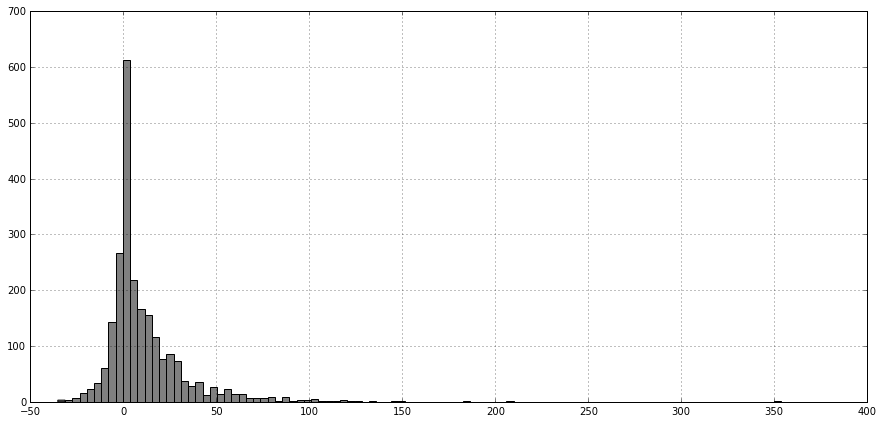

In [21]:
ipos['1st Day % Px Chng '].hist(figsize=(15,7), bins=100, color='grey')

In [22]:
ipos['1st Day % Px Chng '].describe()

count    2335.000000
mean       11.152599
std        22.924024
min       -35.220000
25%         0.000000
50%         3.750000
75%        16.715000
max       353.850000
Name: 1st Day % Px Chng , dtype: float64

In [23]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [24]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN,0.60,2.727273
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN,0.60,3.076923
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN,4.68,30.369890
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN,0.64,3.305785
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN,-1.75,-6.542056


In [25]:
ipos['% Chg Open to Close'].describe()

count    2335.000000
mean        0.816079
std         9.401379
min       -98.522167
25%        -2.817541
50%         0.000000
75%         3.691830
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [26]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
440,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6,6.09,6.22,3.67,6.22,0.22,1,NaN,-6,-98.522167


In [27]:
ipos.loc[440, '$ Chg Opening'] = .09

In [28]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [29]:
ipos['% Chg Open to Close'].describe()

count    2335.000000
mean        0.859187
std         9.173704
min       -49.281222
25%        -2.807285
50%         0.000000
75%         3.691830
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [30]:
ipos[ipos['% Chg Open to Close']<-45]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
1264,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222


In [31]:
ipos.loc[1264, '$ Chg Opening'] = .01
ipos.loc[1264, 'Opening Price'] = 11.26

In [32]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [33]:
ipos['% Chg Open to Close'].describe()

count    2335.000000
mean        0.880407
std         9.114790
min       -40.383333
25%        -2.800000
50%         0.000000
75%         3.691830
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [34]:
ipos.sort_values('% Chg Open to Close')

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
1477,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3,NaN,-24.23,-40.383333
341,2004-10-27,eLong,LONG,Deutsche Bank Securities,13.50,22.00,14.40,6.67,8.50,0.90,3,NaN,-7.60,-34.545455
1670,2013-01-15,"USA Compression Partners, LP",USAC,"Barclays Capital/ Goldman, Sachs/ J.P. Morgan/...",18.00,17.50,11.66,-35.22,-0.50,-6.34,1,NaN,-5.84,-33.371429
795,2006-11-02,ORBCOMM,ORBC,UBS Investment Bank/Morgan Stanley,11.00,11.00,7.75,-29.55,0.00,-3.25,1,NaN,-3.25,-29.545455
2269,2015-06-19,MINDBODY,MB,Morgan Stanley/ Credit Suisse/ UBS Securities,14.00,16.22,11.56,-17.43,2.22,-2.44,3,NaN,-4.66,-28.729963
2274,2015-06-25,Lantheus Holdings,LNTH,Credit Suisse/ Jefferies/ RBC Capital Markets/...,14.00,16.22,11.56,-17.43,2.22,-2.44,1,NaN,-4.66,-28.729963
2127,2014-10-03,Yodlee,YDLE,Goldman Sachs/ Credit Suisse/ BofA Merrill Lynch,12.00,18.81,13.44,12.00,6.81,1.44,3,NaN,-5.37,-28.548644
693,2006-04-26,Harbor Acquisition,HAC.U,Ferris Baker Watts/Brean Murray,6.00,8.65,6.23,3.83,2.65,0.23,1,NaN,-2.42,-27.976879
1057,2007-11-06,Agria,GRO,Credit Suisse,16.50,16.50,12.06,-26.91,0.00,-4.44,3,Missed,-4.44,-26.909091
2106,2014-09-18,ProQR Therapeutics B.V.,PRQR,Leerink Partners/ Deutsche Bank Securities,13.00,19.90,14.73,13.31,6.90,1.73,2,NaN,-5.17,-25.979899


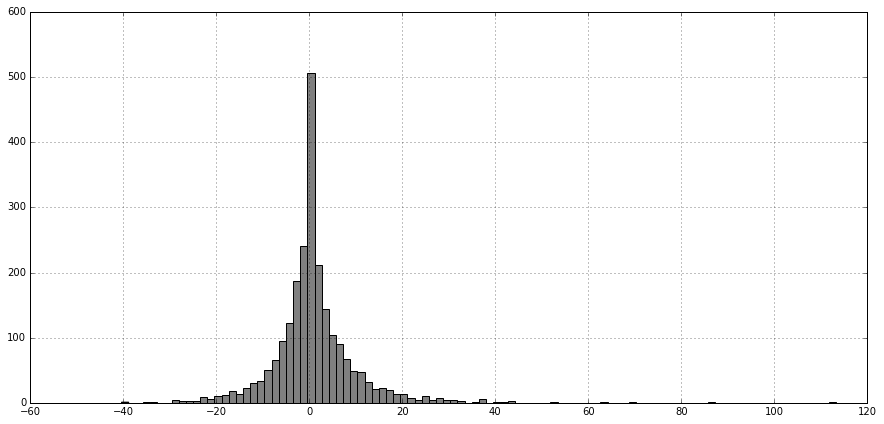

In [35]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [36]:
ipos[ipos['Date']>='2015-01-01']['% Chg Open to Close'].describe()

count    147.000000
mean       0.659105
std       11.334366
min      -28.729963
25%       -3.735019
50%        0.000000
75%        3.706447
max       63.903061
Name: % Chg Open to Close, dtype: float64

In [37]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

33.739999999999995

In [38]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    73.000000
mean      1.574795
std       3.020735
min       0.010000
25%       0.200000
50%       0.670000
75%       1.340000
max      20.040000
Name: $ Chg Open to Close, dtype: float64

In [39]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    65.000000
mean     -1.249538
std       1.381957
min      -6.160000
25%      -1.580000
50%      -0.820000
75%      -0.220000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

In [40]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,1457.599976
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,1438.560059
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000,1432.250000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,1449.680054
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,1465.150024


In [41]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [42]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21


In [43]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN,0.60,2.727273,-4.203722
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN,0.60,3.076923,-1.055120
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN,4.68,30.369890,-1.384096
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN,0.64,3.305785,-2.929317
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN,-1.75,-6.542056,1.365088


In [44]:
ipos[ipos['Date']=='2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1175,2009-08-01,Emdeon,EM,Morgan Stanley,15,17.5,16.52,10.13,2.5,1.52,3,NaN,-0.98,-5.6,NaN


In [45]:
ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')

In [46]:
ipos[ipos['Date']=='2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1865,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2,-0.19,3,NaN,-2.19,-11.837838,NaN


In [47]:
ipos.loc[1865, 'Date'] = pd.to_datetime('2013-11-06')

In [48]:
ipos[ipos['Date']=='2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
2251,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
2252,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [49]:
ipos.loc[2251, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2252, 'Date'] = pd.to_datetime('2015-05-21')

In [50]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [51]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN,0.60,2.727273,-4.203722
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN,0.60,3.076923,-1.055120
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN,4.68,30.369890,-1.384096
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN,0.64,3.305785,-2.929317
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN,-1.75,-6.542056,1.365088


In [52]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,1457.599976
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,1438.560059
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000,1432.250000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,1449.680054
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,1465.150024


In [53]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [54]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [55]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051,0.000000
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051,0.000000
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785,0.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547,0.000000
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN,0.60,2.727273,-4.203722,0.000000
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN,0.60,3.076923,-1.055120,0.000000
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN,4.68,30.369890,-1.384096,0.000000
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN,0.64,3.305785,-2.929317,0.000000
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN,-1.75,-6.542056,1.365088,0.000000


In [56]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: x.split('/')[0])

In [57]:
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [58]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC World Markets
CIBC Worldwide
CRT Capital
CRT Capital Group
CS First Boston
CSFirst Boston
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China Inter'l
China International
Cit
Citi
Citigroup
Cohen
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Craig-Hallum Capital
Credit Suisse
Credit Suis

/Users/alexcombs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [59]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [60]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
DA Davidson
Dawson James Securities
Deutsche Bank
EarlyBirdCapital
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
Friedman Billings Ramsey
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
ING Barings
Imperial Capital
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
KeyBanc Capital Markets
LG Investment & Securities
Ladenburg Thalmann
Laidlaw & Company (UK) Ltd.
Lazard Capital Markets
Leerink Partners
Legg

In [61]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: len(x.split('/')))

In [62]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [63]:
ipos['Month'] = ipos['Date'].map(lambda x: x.month)

In [64]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [65]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-2.745286,0.000000,Bear Stearns,1,Mon,Jan
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,-2.159051,0.000000,Lehman Brothers,2,Fri,Feb
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,-2.159051,0.000000,Salomon Smith Barney,2,Fri,Feb
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-4.465785,0.000000,Lehman Brothers,1,Tues,Feb
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-5.468547,0.000000,Jefferies,1,Thurs,Feb
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,2,NaN,0.60,2.727273,-4.203722,0.000000,ING Barings,1,Fri,Feb
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,3,NaN,0.60,3.076923,-1.055120,0.000000,Salomon Smith Barney,1,Wed,Feb
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,3,NaN,4.68,30.369890,-1.384096,0.000000,Salomon Smith Barney,1,Fri,Feb
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,2,NaN,0.64,3.305785,-2.929317,0.000000,Merrill Lynch,2,Fri,Feb
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,3,NaN,-1.75,-6.542056,1.365088,0.000000,CSFB,1,Wed,Feb


In [66]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [67]:
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [68]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,...,0.00,0.000000,-2.745286,0.000000,Bear Stearns,1,Mon,Jan,16.094584,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,...,0.04,0.333056,-2.159051,0.000000,Lehman Brothers,2,Fri,Feb,0.083264,0.333056
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,...,-0.95,-3.161398,-2.159051,0.000000,Salomon Smith Barney,2,Fri,Feb,6.821963,-3.161398
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,...,0.85,4.000000,-4.465785,0.000000,Lehman Brothers,1,Tues,Feb,4.705882,4.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,...,1.11,6.491228,-5.468547,0.000000,Jefferies,1,Thurs,Feb,6.432749,6.491228
5,2002-02-08,Wimm Bill Dann Foods,WBD,ING Barings,19.50,22.00,22.60,15.90,2.50,3.10,...,0.60,2.727273,-4.203722,0.000000,ING Barings,1,Fri,Feb,11.363636,2.727273
6,2002-02-13,GameStop,GME,Salomon Smith Barney,18.00,19.50,20.10,11.67,1.50,2.10,...,0.60,3.076923,-1.055120,0.000000,Salomon Smith Barney,1,Wed,Feb,7.692308,3.076923
7,2002-02-15,PayPal,PYPL,Salomon Smith Barney,13.00,15.41,20.09,54.54,2.41,7.09,...,4.68,30.369890,-1.384096,0.000000,Salomon Smith Barney,1,Fri,Feb,15.639195,30.369890
8,2002-02-22,PETCO Animal Supplies,PETC,Merrill Lynch/Morgan Stanley,19.00,19.36,20.00,5.26,0.36,1.00,...,0.64,3.305785,-2.929317,0.000000,Merrill Lynch,2,Fri,Feb,1.859504,3.305785
9,2002-02-27,Integrated Defense,IDE,Credit Suisse First Boston,22.00,26.75,25.00,13.64,4.75,3.00,...,-1.75,-6.542056,1.365088,0.000000,CSFB,1,Wed,Feb,17.757009,-6.542056


In [69]:
ipos.columns

Index(['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead Mangager', 'Offer Price',
       'Opening Price', '1st Day Close', '1st Day % Px Chng ', '$ Chg Opening',
       '$ Chg Close', 'Star Ratings', 'Performed', '$ Chg Open to Close',
       '% Chg Open to Close', 'SP Week Change', 'SP Close to Open Chg Pct',
       'Lead Mgr', 'Total Underwriters', 'Week Day', 'Month', 'Gap Open Pct',
       'Open to Close Pct'],
      dtype='object')

In [70]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')

In [71]:
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,16.094584,2.11,11.00,13.11,0.000000,-2.745286
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,0.083264,0.01,12.00,12.01,0.000000,-2.159051
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,6.821963,2.05,28.00,30.05,0.000000,-2.159051
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,4.705882,1.00,20.25,21.25,0.000000,-4.465785
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,6.432749,1.10,16.00,17.10,0.000000,-5.468547
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,11.363636,2.50,19.50,22.00,0.000000,-4.203722
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,7.692308,1.50,18.00,19.50,0.000000,-1.055120
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,15.639195,2.41,13.00,15.41,0.000000,-1.384096
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,1.859504,0.36,19.00,19.36,0.000000,-2.929317
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,17.757009,4.75,22.00,26.75,0.000000,1.365088


In [75]:
# Index of first 2015 IPO is 2188, 2014 is 1900
idx = 2188
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

In [76]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
clf.score(X_test, y_test)

0.59863945578231292

In [78]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    147.000000
mean       0.229524
std        2.686850
min       -6.160000
25%       -0.645000
50%        0.000000
75%        0.665000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [79]:
pred_label = clf.predict(X_test)

In [80]:
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

In [81]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [82]:
rf

,index,$ chg,predicted,actual,correct
0,2188,0.01,0,0,1
1,2189,3.03,1,1,1
2,2190,-1.06,0,0,1
3,2191,-2.67,0,0,1
4,2192,2.74,0,1,0
5,2193,-4.05,0,0,1
6,2194,-1.10,0,0,1
7,2195,0.35,0,1,0
8,2196,-0.50,0,0,1
9,2197,-0.65,1,0,0


In [83]:
rf[rf['predicted']==1]['$ chg'].sum()

45.519999999999996

In [84]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].sum()

33.739999999999995

In [85]:
rf[rf['predicted']==1]['$ chg'].describe()

count    25.000000
mean      1.820800
std       5.520852
min      -6.160000
25%      -1.000000
50%       0.090000
75%       2.120000
max      20.040000
Name: $ chg, dtype: float64

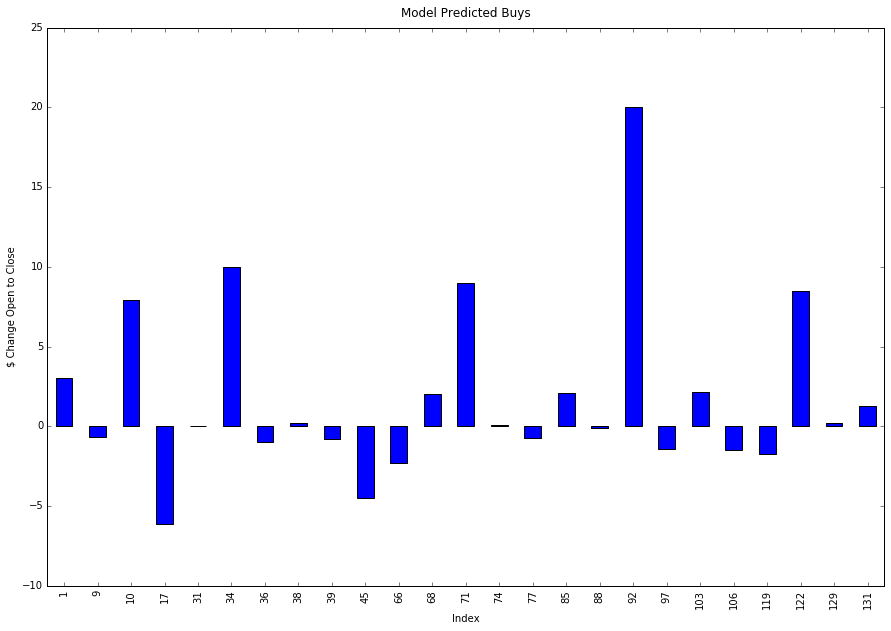

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [87]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.043891,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
1,1.022947,"Q(""Lead Mgr"")[T.Morgan Keegan]"
2,1.016990,"Q(""Lead Mgr"")[T.Wachovia]"
3,0.815448,"Q(""Lead Mgr"")[T.China International]"
4,0.684503,"Q(""Lead Mgr"")[T.Merrill Lynch]"
5,0.672572,"Q(""Lead Mgr"")[T.Burnham Securities]"
6,0.642754,"Q(""Lead Mgr"")[T.Anderson & Strudrick]"
7,0.627048,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
8,0.595898,"Q(""Lead Mgr"")[T.FIG Partners]"
9,0.538498,"Q(""Lead Mgr"")[T.Sanders Morris Harris]"


In [88]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.132437,"Q(""Week Day"")[T.Mon]"
13,0.053885,"Q(""Week Day"")[T.Thurs]"
14,-0.062727,"Q(""Week Day"")[T.Tues]"
15,-0.039074,"Q(""Week Day"")[T.Wed]"


In [89]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
33,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,0.62,3.542857,2.480647,0.000000,Morgan Keegan,2,Tues,May,5.714286,3.542857
518,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,1.777992,0.000000,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,19.284294
884,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,0.363086,-0.010330,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504
1467,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,0.25,1.694915,-3.693126,-0.003091,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf_rf = RandomForestClassifier(n_estimators=5000)

In [92]:
model = clf_rf.fit(X_train, y_train)

In [93]:
clf_rf.score(X_test, y_test)

0.59183673469387754

In [94]:
pred_label_rf = model.predict(X_test)

In [95]:
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])

In [96]:
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [97]:
rf2.sort_values('$ chg', ascending=False)

,index,$ chg,predicted,actual,correct
92,2280,20.04,1,1,1
34,2222,10.00,0,1,0
71,2259,8.97,0,1,0
122,2310,8.46,0,1,0
10,2198,7.95,0,1,0
120,2308,6.60,0,1,0
1,2189,3.03,0,1,0
4,2192,2.74,0,1,0
69,2257,2.50,0,1,0
75,2263,2.17,0,1,0


In [98]:
rf2[rf2['predicted']==1]['$ chg'].sum()

15.890000000000002

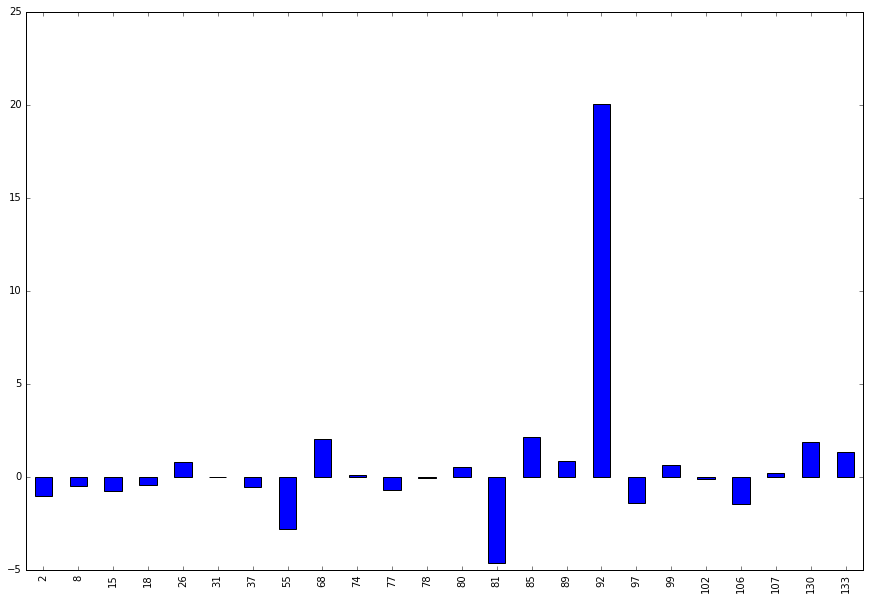

In [99]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(15,10))

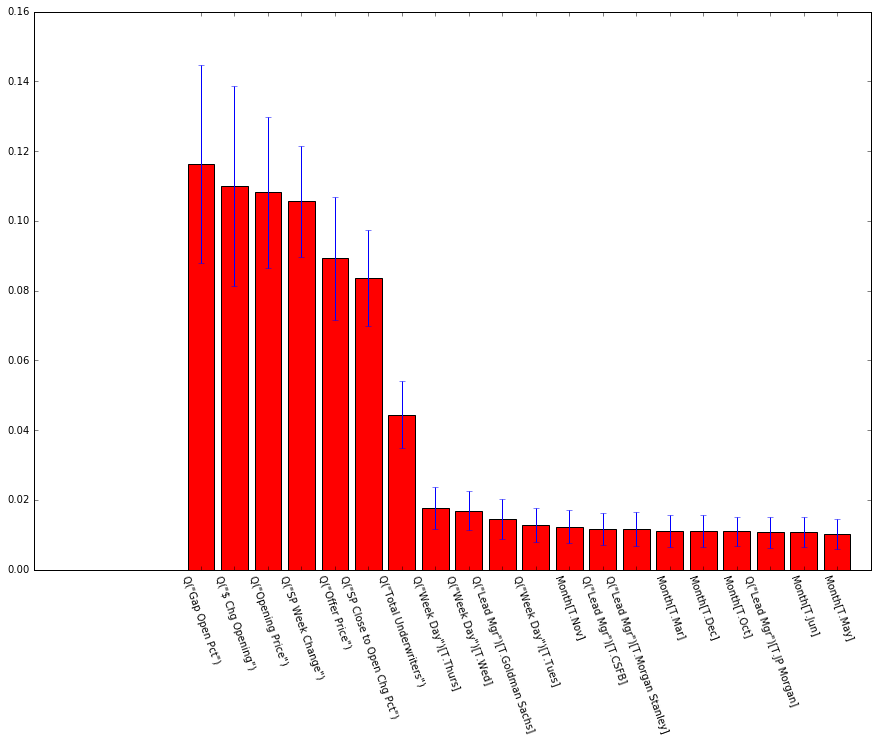

In [100]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);